In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from CSV into a DataFrame
df = pd.read_csv('mario.csv')

# Display a preview of the data
print(df.head())

   team_id  phase    group  round  totalingred
0    21301      1  newhire      1           19
1    21301      1  newhire      2           23
2    21301      1  newhire      3           23
3    21301      1  newhire      4           25
4    21301      1  newhire      5           24


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team_id      660 non-null    int64 
 1   phase        660 non-null    int64 
 2   group        660 non-null    object
 3   round        660 non-null    int64 
 4   totalingred  660 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 25.9+ KB


In [5]:
# Unique values in the 'Phase' column
unique_phases = df['phase'].unique()
print("Unique phases:", unique_phases)

# Unique values in the 'Group' column
unique_groups = df['group'].unique()
print("Unique groups:", unique_groups)

unique_groups = df['team_id'].unique()
print("Unique team_id:", unique_groups)

unique_groups = df['round'].unique()
print("Unique round:", unique_groups)


Unique phases: [1 2]
Unique groups: ['newhire' 'ai' 'control']
Unique team_id: [ 21301  21312  21410  21411  21412  22010  22011  22012  22412  22512
  22712  22811  30503  30505  31103 101602 101603 102401 102410 102411
 102412 102901 102910 103110 103111 103112 110510 110511 110801 110811
 110812 111401 111501 111512 111901 111911 111912 112102 112103 112104
 112105 112203 112205 112501 112503 112504 112505 112510 112511 112601
 112602 112610 112611 112612 120901]
Unique round: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [25]:
# Unique count for each group
unique_counts = df['group'].value_counts()

# Display the unique count for each group
print("Unique count for each group:")
print(unique_counts)

Unique count for each group:
ai         240
control    240
newhire    180
Name: group, dtype: int64


In [12]:
# Filter for 'ai' group in Phase 1 and Phase 2 data separately
ai_phase1_data = df[(df['phase'] == 1) & (df['group'] == 'ai')]
ai_phase2_data = df[(df['phase'] == 2) & (df['group'] == 'ai')]

# Pivot the 'ai' group data for comparison between Phase 1 and Phase 2
ai_comparison_table = pd.merge(
    ai_phase1_data.pivot_table(index='team_id', values='totalingred', aggfunc='mean'),
    ai_phase2_data.pivot_table(index='team_id', values='totalingred', aggfunc='mean'),
    on='team_id', suffixes=('_phase1', '_phase2')
)

print("Comparison of 'ai' group values for each team_id between Phase 1 and Phase 2:")
print(ai_comparison_table)

Comparison of 'ai' group values for each team_id between Phase 1 and Phase 2:
         totalingred_phase1  totalingred_phase2
team_id                                        
101602            21.166667           28.333333
101603            27.666667           28.500000
102401            23.500000           27.000000
102410            28.166667           30.333333
102411            24.166667           26.333333
102412            25.000000           27.333333
110510            19.333333           24.166667
110511            20.500000           24.000000
110811            21.166667           23.833333
110812            22.333333           26.166667
112203            26.000000           27.000000
112205            23.000000           27.333333
112501            22.666667           25.166667
112503            24.333333           27.000000
112504            27.833333           30.833333
112505            18.000000           21.000000
112510            21.500000           24.000000
112511    

In [27]:
# Filter for 'ai' group in Phase 1 and Phase 2 data separately
ai_phase1_data = df[(df['phase'] == 1) & (df['group'] == 'ai')]
ai_phase2_data = df[(df['phase'] == 2) & (df['group'] == 'ai')]

# Compute basic statistics for 'totalingred' in 'ai' Phase 1
ai_phase1_stats = ai_phase1_data['totalingred'].describe()

# Compute basic statistics for 'totalingred' in 'ai' Phase 2
ai_phase2_stats = ai_phase2_data['totalingred'].describe()

# Display basic statistics for 'ai' in Phase 1 and Phase 2
print("Basic statistics for 'ai' in Phase 1:")
print(ai_phase1_stats)
print("\nBasic statistics for 'ai' in Phase 2:")
print(ai_phase2_stats)

Basic statistics for 'ai' in Phase 1:
count    120.000000
mean      23.125000
std        4.560633
min        9.000000
25%       21.000000
50%       23.000000
75%       26.000000
max       33.000000
Name: totalingred, dtype: float64

Basic statistics for 'ai' in Phase 2:
count    120.000000
mean      26.233333
std        3.379954
min       17.000000
25%       24.000000
50%       26.500000
75%       29.000000
max       36.000000
Name: totalingred, dtype: float64


In [13]:
# Filter for 'newhire' group in Phase 1 and Phase 2 data separately
newhire_phase1_data = df[(df['phase'] == 1) & (df['group'] == 'newhire')]
newhire_phase2_data = df[(df['phase'] == 2) & (df['group'] == 'newhire')]

# Pivot the 'newhire' group data for comparison between Phase 1 and Phase 2
newhire_comparison_table = pd.merge(
    newhire_phase1_data.pivot_table(index='team_id', values='totalingred', aggfunc='mean'),
    newhire_phase2_data.pivot_table(index='team_id', values='totalingred', aggfunc='mean'),
    on='team_id', suffixes=('_phase1', '_phase2')
)

print("Comparison of 'newhire' group values for each team_id between Phase 1 and Phase 2:")
print(newhire_comparison_table)

Comparison of 'newhire' group values for each team_id between Phase 1 and Phase 2:
         totalingred_phase1  totalingred_phase2
team_id                                        
21301             23.500000           29.000000
21312             23.500000           30.666667
21410             26.833333           25.166667
21411             20.000000           24.333333
21412             24.000000           30.000000
22010             21.000000           23.833333
22011             18.166667           22.333333
22012             24.500000           27.666667
22412             23.500000           29.166667
22512             18.833333           25.166667
22712             24.166667           28.500000
22811             26.000000           30.000000
30503             25.333333           31.166667
30505             25.833333           24.666667
31103             26.500000           25.333333


In [21]:
# Compute basic statistics for 'newhire' in Phase 1 and Phase 2 for the 'control' group
newhire_phase1_stats = newhire_phase1_data['totalingred'].describe()
newhire_phase2_stats = newhire_phase2_data['totalingred'].describe()

print("Basic statistics for 'newhire' group in Phase 1:")
print(newhire_phase1_stats)
print("\nBasic statistics for 'newhire' group in Phase 2:")
print(newhire_phase2_stats)

Basic statistics for 'newhire' group in Phase 1:
count    90.000000
mean     23.444444
std       4.419342
min      13.000000
25%      21.250000
50%      24.000000
75%      27.000000
max      33.000000
Name: totalingred, dtype: float64

Basic statistics for 'newhire' group in Phase 2:
count    90.000000
mean     27.133333
std       3.892372
min      18.000000
25%      25.000000
50%      27.000000
75%      30.000000
max      36.000000
Name: totalingred, dtype: float64


In [14]:
# Filter for 'control' group in Phase 1 and Phase 2 data separately
control_phase1_data = df[(df['phase'] == 1) & (df['group'] == 'control')]
control_phase2_data = df[(df['phase'] == 2) & (df['group'] == 'control')]

# Pivot the 'control' group data for comparison between Phase 1 and Phase 2
control_comparison_table = pd.merge(
    control_phase1_data.pivot_table(index='team_id', values='totalingred', aggfunc='mean'),
    control_phase2_data.pivot_table(index='team_id', values='totalingred', aggfunc='mean'),
    on='team_id', suffixes=('_phase1', '_phase2')
)

print("Comparison of 'control' group values for each team_id between Phase 1 and Phase 2:")
print(control_comparison_table)

Comparison of 'control' group values for each team_id between Phase 1 and Phase 2:
         totalingred_phase1  totalingred_phase2
team_id                                        
102901            26.833333           33.166667
102910            21.333333           26.000000
103110            24.500000           28.166667
103111            19.500000           24.833333
103112            24.333333           28.666667
110801            24.333333           25.666667
111401            21.333333           25.166667
111501            21.500000           26.500000
111512            22.833333           27.666667
111901            18.333333           22.166667
111911            22.000000           26.500000
111912            23.500000           28.166667
112102            23.666667           27.833333
112103            21.666667           26.833333
112104            18.833333           24.500000
112105            24.500000           27.333333
112601            18.333333           22.666667
11260

In [15]:
# Compute basic statistics for 'totalingred' in Phase 1 and Phase 2 for the 'control' group
control_phase1_stats = control_phase1_data['totalingred'].describe()
control_phase2_stats = control_phase2_data['totalingred'].describe()

print("Basic statistics for 'control' group in Phase 1:")
print(control_phase1_stats)
print("\nBasic statistics for 'control' group in Phase 2:")
print(control_phase2_stats)

Basic statistics for 'control' group in Phase 1:
count    120.000000
mean      22.441667
std        4.250152
min       11.000000
25%       20.000000
50%       23.000000
75%       25.000000
max       31.000000
Name: totalingred, dtype: float64

Basic statistics for 'control' group in Phase 2:
count    120.000000
mean      26.750000
std        3.262339
min       18.000000
25%       25.000000
50%       27.000000
75%       28.250000
max       34.000000
Name: totalingred, dtype: float64


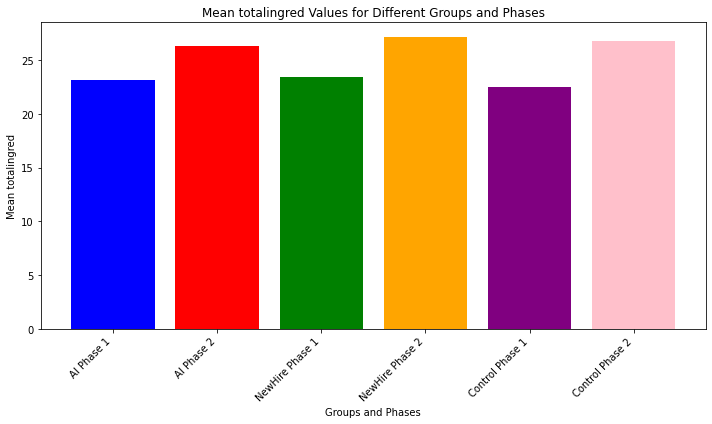

In [28]:
import matplotlib.pyplot as plt

# Mean 'totalingred' values for each group and phase just for reference
means = {
    'AI Phase 1': 23.125, 'AI Phase 2': 26.33,
    'NewHire Phase 1': 23.44, 'NewHire Phase 2': 27.13,
    'Control Phase 1': 22.44, 'Control Phase 2': 26.75
}

# Extracting data for x-axis labels and y-axis values
labels = list(means.keys())
values = list(means.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'red', 'green', 'orange', 'purple', 'pink'])
plt.xlabel('Groups and Phases')
plt.ylabel('Mean totalingred')
plt.title('Mean totalingred Values for Different Groups and Phases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


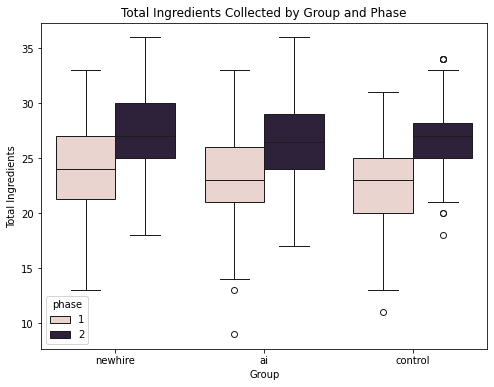

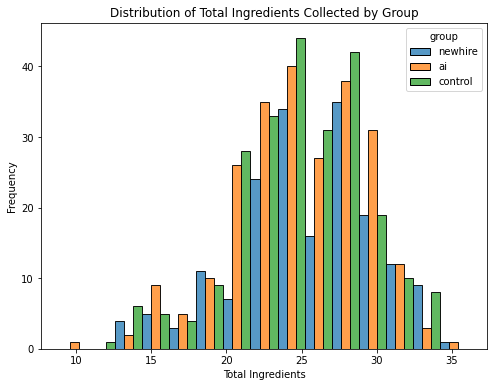

In [3]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='totalingred', hue='phase', data=df)
plt.title('Total Ingredients Collected by Group and Phase')
plt.xlabel('Group')
plt.ylabel('Total Ingredients')
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='totalingred', hue='group', multiple='dodge', bins=15)
plt.title('Distribution of Total Ingredients Collected by Group')
plt.xlabel('Total Ingredients')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Mean 'totalingred' values for each group and phase
means = {
    'AI Phase 1': 23.13, 'AI Phase 2': 26.23,
    'NewHire Phase 1': 23.44, 'NewHire Phase 2': 27.13,
    'Control Phase 1': 22.44, 'Control Phase 2': 26.75
}

# Calculate percentage change in mean 'totalingred' between Phase 1 and Phase 2 for each group
ai_change = ((means['AI Phase 2'] - means['AI Phase 1']) / means['AI Phase 1']) * 100
newhire_change = ((means['NewHire Phase 2'] - means['NewHire Phase 1']) / means['NewHire Phase 1']) * 100
control_change = ((means['Control Phase 2'] - means['Control Phase 1']) / means['Control Phase 1']) * 100

# Create a table to display percentage changes
import pandas as pd

data = {
    'Group': ['AI', 'NewHire', 'Control'],
    'Percentage Change': [ai_change, newhire_change, control_change]
}

df_percentage_change = pd.DataFrame(data)
print(df_percentage_change)
df_percentage_change.to_excel('percentage_change.xlsx')


     Group  Percentage Change
0       AI          13.402508
1  NewHire          15.742321
2  Control          19.206774


In [9]:
# Data for percentage change in mean, std, and percentiles
import html


data = {
    'Group': ['AI', 'NewHire', 'Control'],
    'Mean Change (%)': [((26.233333 - 23.125) / 23.125) * 100, ((27.133333 - 23.444444) / 23.444444) * 100, ((26.75 - 22.441667) / 22.441667) * 100],
    'Std Change (%)': [((3.379954 - 4.560633) / 4.560633) * 100, ((3.892372 - 4.419342) / 4.419342) * 100, ((3.262339 - 4.250152) / 4.250152) * 100],
    '25% Change (%)': [((24 - 21) / 21) * 100, ((25 - 21.25) / 21.25) * 100, ((25 - 20) / 20) * 100],
    '50% Change (%)': [((26.5 - 23) / 23) * 100, ((27 - 24) / 24) * 100, ((27 - 23) / 23) * 100],
    '75% Change (%)': [((29 - 26) / 26) * 100, ((30 - 27) / 27) * 100, ((28.25 - 25) / 25) * 100]
}

# Create a DataFrame
df_percentage_change = pd.DataFrame(data)

# Display the DataFrame
df_percentage_change.style
df_percentage_change.to_excel("desct.xlsx")


In [33]:
from scipy import stats

# Data 
ai_phase1 = [23.13, 26.23]  # Mean 'totalingred' for 'ai' in Phase 1 and Phase 2
newhire_phase1 = [23.44, 27.13]  # Mean 'totalingred' for 'newhire' in Phase 1 and Phase 2
control_phase1 = [22.44, 26.75]  # Mean 'totalingred' for 'control' in Phase 1 and Phase 2

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(ai_phase1, newhire_phase1, control_phase1)

# Display the F-statistic and p-value
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Check if ANOVA is significant
if p_value < 0.05:
    print("ANOVA result: There is a significant difference between groups in Phase 2")

    # Perform Tukey HSD post-hoc test
    data = pd.DataFrame({'Totalingred': ai_phase1 + newhire_phase1 + control_phase1,
                         'Group': ['AI'] * 2 + ['NewHire'] * 2 + ['Control'] * 2})
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    tukey = pairwise_tukeyhsd(data['Totalingred'], data['Group'])
    print(tukey.summary())
else:
    print("ANOVA result: No significant difference found between groups in Phase 2")


F-statistic: 0.040636617211534325
P-value: 0.9606972884498188
ANOVA result: No significant difference found between groups in Phase 2


In [13]:

# Data 
ai_phase1 = [23.13, 26.23]  # Mean 'totalingred' for 'ai' in Phase 1 and Phase 2
newhire_phase1 = [23.44, 27.13]  # Mean 'totalingred' for 'newhire' in Phase 1 and Phase 2
control_phase1 = [22.44, 26.75]  # Mean 'totalingred' for 'control' in Phase 1 and Phase 2

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(ai_phase1, newhire_phase1, control_phase1)

# Display the F-statistic and p-value
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


# Perform Tukey HSD post-hoc test
data = pd.DataFrame({'Totalingred': ai_phase1 + newhire_phase1 + control_phase1,
                         'Group': ['AI'] * 2 + ['NewHire'] * 2 + ['Control'] * 2})
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(data['Totalingred'], data['Group'])
print(tukey.summary())



F-statistic: 0.040636617211534325
P-value: 0.9606972884498188
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
     AI Control   -0.085 0.9994 -11.1148 10.9448  False
     AI NewHire    0.605 0.9717 -10.4248 11.6348  False
Control NewHire     0.69 0.9635 -10.3398 11.7198  False
-------------------------------------------------------


In [37]:
#T-test
from scipy.stats import ttest_ind

# Subset the data for each group
ai_data = df[df['group'] == 'ai']['totalingred']
newhire_data = df[df['group'] == 'newhire']['totalingred']
control_data = df[df['group'] == 'control']['totalingred']

# Perform t-tests between specific pairs of groups
t_stat_ai_newhire, p_val_ai_newhire = ttest_ind(ai_data, newhire_data, equal_var=False)
t_stat_ai_control, p_val_ai_control = ttest_ind(ai_data, control_data, equal_var=False)
t_stat_newhire_control, p_val_newhire_control = ttest_ind(newhire_data, control_data, equal_var=False)

# Display the p-values
print("P-value for AI vs. NewHire:", p_val_ai_newhire)
print("P-value for AI vs. Control:", p_val_ai_control)
print("P-value for NewHire vs. Control:", p_val_newhire_control)


P-value for AI vs. NewHire: 0.16464167263500837
P-value for AI vs. Control: 0.8329496416659321
P-value for NewHire vs. Control: 0.1162315219297295


In [40]:
#Testing for Equal Variances: Levene
from scipy.stats import levene

# Subset data for each group
ai_data = df[df['group'] == 'ai']['totalingred']
newhire_data = df[df['group'] == 'newhire']['totalingred']
control_data = df[df['group'] == 'control']['totalingred']

# Test for equal variances among the groups
statistic, p_val_variances = levene(ai_data, newhire_data, control_data)

# Display the p-value
print("P-value for Equal Variances:", p_val_variances)


P-value for Equal Variances: 0.7365658360812163


In [41]:
#Testing Linear Relationships: linear regression for each group

import statsmodels.api as sm

# Create dummy variables for the groups
df['is_ai'] = (df['group'] == 'ai').astype(int)
df['is_newhire'] = (df['group'] == 'newhire').astype(int)
df['is_control'] = (df['group'] == 'control').astype(int)

# Fit linear regression models for each group
model_ai = sm.OLS(df[df['group'] == 'ai']['totalingred'], sm.add_constant(df[df['group'] == 'ai'][['is_ai']]))
model_newhire = sm.OLS(df[df['group'] == 'newhire']['totalingred'], sm.add_constant(df[df['group'] == 'newhire'][['is_newhire']]))
model_control = sm.OLS(df[df['group'] == 'control']['totalingred'], sm.add_constant(df[df['group'] == 'control'][['is_control']]))

# Get summary statistics for each model
results_ai = model_ai.fit()
results_newhire = model_newhire.fit()
results_control = model_control.fit()

# Extract slope coefficients and p-values
print("Slope for AI:", results_ai.params['is_ai'], "P-value:", results_ai.pvalues['is_ai'])
print("Slope for NewHire:", results_newhire.params['is_newhire'], "P-value:", results_newhire.pvalues['is_newhire'])
print("Slope for Control:", results_control.params['is_control'], "P-value:", results_control.pvalues['is_control'])


Slope for AI: 24.679166666666667 P-value: 3.414610113427199e-185
Slope for NewHire: 25.28888888888888 P-value: 8.401564028244837e-137
Slope for Control: 24.59583333333333 P-value: 1.4952241222451737e-183
